# U.S. Medical Insurance Costs

## Objectives

### Personal Goals:
The goals I have for this project are as follows:
   1. Organize data into usable variables for analysis
   2. Learn how to present my findings in basic tables, charts, and graphs using tabulate and matplotlib.
   3. Practice using Python class methods (one minute I understand, the next I don't 😅).
   4. Write clearly defined code using what I've learned and summarize findings. 
---
### Codecademy Project Objectives:
    * Work locally on your own computer
    * Import a dataset into your program
    * Analyze a dataset by building out functions or class methods
    * Use libraries to assist in your analysis
    * Optional: Document and organize your findings
    * Optional: Make predictions about a dataset’s features based on your findings.

## Overview
The Codecademy Data Science Pathway offers a Python Fundamentals course for the student to get started with coding and datasets right away. This project is the culmination of the Python Fundamentals course and is intended to provide some insight into the development of the student’s coding abilities without the usual prompts, questions, and answers provided.

Except where indicated, all work is my own. 

## Methodology
Before importing the datafile, I looked over the data to get an idea of what is offered for analysis.  The dataset is presented in .csv format with 7 columns representing age, sex, bmi, number of children, smoking status, region, and annual insurance cost. 

The dataset has no errors or omissions.

I will be looking for basic statistical values present among the dataset and comparing those values by breaking down the data by column. 

I would like to know if certain factors affect the actual cost of insurance more than others. 

The methodology for collecting the data is unknown. 

## Integrity
The original dataset has not been manipulated in any way. The process for pulling different parts of the data has been carefully performed to keep the data in original order and fully intact.

Much of the numerical data contains decimal values (floats). As much as I was able, I limited the decimal values to 2 places to keep the numbers uniform and simple. In the future, I look forward to learning what the conventions are for this type of data and how to maintain the integrity of significant figures.

In [1]:
#Import the data file and any libraries or modules I have identified that I will need.

import csv
import math
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon
import numpy as np
import statistics
import pandas as pd

#identify variables
age = []
age_str = []
sex = []
sex_alpha = []
bmi_str = []
bmi = []
children_str = []
children = []
smoker_alpha = []
smoker = []
region = []
charges = []
charges_str = []

#Use a reader to read the data file and export each row to an empty list.
with open('insurance.csv') as ins_data:
  ins_dict = []
  for line in csv.DictReader(ins_data):
    ins_dict.append(line)
    age_str.append(line['age'])
    sex_alpha.append(line['sex'])
    bmi_str.append(line['bmi'])
    children_str.append(line['children'])
    smoker_alpha.append(line['smoker'])
    region.append(line['region'])
    charges_str.append(line['charges'])

# Convert strings to numbers/floats
for x in charges_str:
    charges.append(float(x))

for x in bmi_str:
    bmi.append(float(x))

for x in age_str:
    age.append(int(x))

for x in children_str:
    children.append(int(x))
    
#convert alpha values to numeric:
for item in sex_alpha:
    if item == 'female':
        x = 0
    elif item == 'male':
        x = 1
    sex.append(x)
    
for item in smoker_alpha:
    if item == 'yes':
        x = 1
    elif item == 'no':
        x = 0
    smoker.append(x)

#test dictionary and find out how many datapoints there are and make sure my import was successful.
print(ins_dict[:5])
total_datapoints = len(ins_dict)
print("There are a total of: {} datapoints.".format(total_datapoints))

#test: did my data append correctly?
#print(age[:5])
#print(charges[:5])
#print(bmi[:5])
#print(children[:5])
#print(sex[:5])
#print(smoker[:5])
print('Success!')

[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}]
There are a total of: 1338 datapoints.
Success!


In [2]:
# Use a class with basic functions and math to analyze ages: Calculate mean, median, mode, and range of ages

class Ages:
    def __init__(self, age, charges):
        self.ages = age
        self.charges = charges
 
    def avg_age(self):
        total_ages = 0
        for x in self.ages:
          total_ages += int(x)
        avg_age = '{:2.2f}'.format(total_ages/total_datapoints)
        return avg_age   

    def age_mode(self):
        mode_age = 0
        age_count = 0
        for x in self.ages:
            if self.ages.count(x) > age_count:
                mode_age = x
                age_count = self.ages.count(x)
        return [mode_age, age_count]

# Get max, min, and range of ages.
max_age = max(age)
min_age = min(age)
age_range = max_age - min_age    

# Create a sorted list of ages. Length of dataset is 1338 which is an even number. Midpoint of dataset would be index[669], so use [669] and [668] as midpoints to calculate median value of ages.
age_sort = age
age_sort.sort()
median_age = 0
median_age += (age_sort[669] + age_sort[668])/2   

In [3]:
Age_Data = Ages(age, charges)

# Tabulate my findings.
Age_Stats = [['', 'Mean', 'Median', 'Mode', 'Mode Count', 'Range', 'Max', 'Min'], ['Ages', Age_Data.avg_age(), median_age, Age_Data.age_mode()[0], Age_Data.age_mode()[1], age_range, max_age, min_age]]

print(tabulate(Age_Stats, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤════════╤══════════╤════════╤══════════════╤═════════╤═══════╤═══════╕
│      │   Mean │   Median │   Mode │   Mode Count │   Range │   Max │   Min │
╞══════╪════════╪══════════╪════════╪══════════════╪═════════╪═══════╪═══════╡
│ Ages │  39.21 │       39 │     18 │           69 │      46 │    64 │    18 │
╘══════╧════════╧══════════╧════════╧══════════════╧═════════╧═══════╧═══════╛


* Note:
While I was learning about other things like tabulate, I kept coming across answers using pandas. I decided to try using pandas to tabulate the statistical data for the population.
This is my first time using pandas, DataFrames, and anything else associated with pandas.

In [4]:
# Learning to work with pandas & matplotlib to describe and display statistical information for the numerical variables (age, bmi, children, charges) in our dataset.

# First create a DataFrame for the numerical data in the datafile. Use .describe() to get a quick calculation of common statistical values.

Population_df = pd.read_csv('insurance.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# couldn't figure out an easier way to get the frequency of each calculated mode value. I only really wanted age, children, smoker status, sex, and region modes, but I did them all so that I could avoid errors in the dataframe.

Mode_Freq = []
Mode_Freq.append(age.count(statistics.mode(age)))
Mode_Freq.append(bmi.count(statistics.mode(bmi)))
Mode_Freq.append(children.count(statistics.mode(children)))
Mode_Freq.append(charges.count(statistics.mode(charges)))
Mode_Freq.append(sex.count(statistics.mode(sex)))
Mode_Freq.append(smoker.count(statistics.mode(smoker)))
Mode_Freq.append(region.count(statistics.mode(region)))

# append new rows to basic df.describe() method for mode, range, and mode frequency.
def desc_new(df):
    df1 = df.describe().append((df.mode()).rename(index={0:'mode'}))
    df1.loc['mode freq'] = [x for x in Mode_Freq]
    df1.loc['range'] = df1.loc['max'] - df1.loc['min']
    return df1

# I tried to replace nan with a blank space or dash, but I couldn't get it to work. I did convert nan values to '-' in my .pdf.
pop_string = 'Statistical Data for the Population'
headers = ('age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region')

#print(desc_new(Population_df))
#print(Population_df.head())

## Insights and Analysis
There are 1338 rows representing 1338 individual patients, insurance cost factors, and annual charges.
There are 1064 nonsmokers represented and there are slightly more males than females.

The average patient is 39 years old with a BMI of 30.66. They have approximately 1 child and were charged $13,270.42 for insurance.

There are 3% more patients in the Southeast region than any other region.

In [5]:
print(pop_string.center(80) + '\n' + tabulate(desc_new(Population_df), headers=headers, tablefmt='fancy_grid'))

                      Statistical Data for the Population                       
╒═══════════╤══════════╤════════════╤════════════╤═══════════╤═══════╤══════════╤═══════════╕
│           │      age │        bmi │   children │   charges │ sex   │ smoker   │ region    │
╞═══════════╪══════════╪════════════╪════════════╪═══════════╪═══════╪══════════╪═══════════╡
│ count     │ 1338     │ 1338       │ 1338       │   1338    │ nan   │ nan      │ nan       │
├───────────┼──────────┼────────────┼────────────┼───────────┼───────┼──────────┼───────────┤
│ mean      │   39.207 │   30.6634  │    1.09492 │  13270.4  │ nan   │ nan      │ nan       │
├───────────┼──────────┼────────────┼────────────┼───────────┼───────┼──────────┼───────────┤
│ std       │   14.05  │    6.09819 │    1.20549 │  12110    │ nan   │ nan      │ nan       │
├───────────┼──────────┼────────────┼────────────┼───────────┼───────┼──────────┼───────────┤
│ min       │   18     │   15.96    │    0       │   1121.87 │ nan   │ na

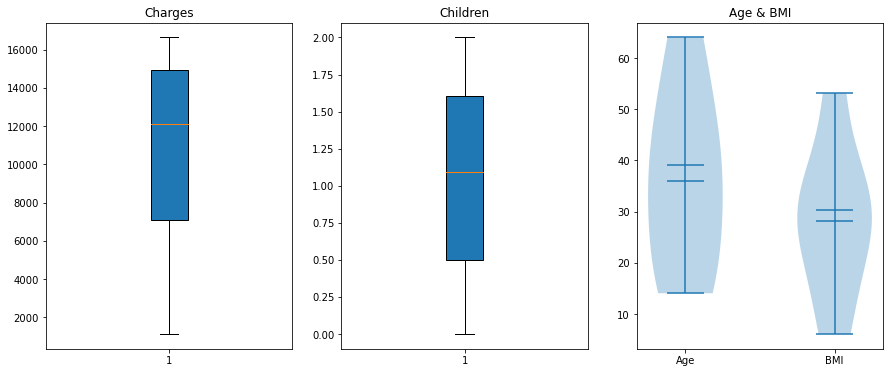

In [6]:
# Range for Age and BMI is close. Use pandas, NumPy, and matplotlib to visualize Age and BMI in a violinplot.
# Visualize Charges and Children in separate boxplots.

# Use pandas to create a Series from Charges. Use NumPy to create an array for the series. Plot the findings using boxplot.
s_charges = pd.Series(charges)
s1_charges = s_charges.describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
charges_arr = np.array(s1_charges)

# Do the same for Children.
s_children = pd.Series(children)
s2_children = s_children.describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
children_arr = np.array(s2_children)

# Do the same for Age & BMI.
s_Age = pd.Series(age)
s_BMI = pd.Series(bmi)
s3_age = s_Age.describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
s4_bmi = s_BMI.describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
Age_arr = np.array(s3_age)
BMI_arr = np.array(s4_bmi)
Age_BMI_data = [Age_arr, BMI_arr]

# Plot data in boxplot and vionlinplot:
green_diamond = dict(markerfacecolor='g', marker='D')
fig, axis = plt.subplots(1, 3, figsize= (15, 6))
axis[0].boxplot(charges_arr, patch_artist = True, showfliers= False)
axis[0].set_title('Charges')

axis[1].boxplot(children_arr, patch_artist= True, showfliers= False)
axis[1].set_title('Children')

axis[2].violinplot((Age_arr, BMI_arr), showmeans= True, showmedians= True)
axis[2].set_title('Age & BMI')
plt.setp(axis[2], xticks=[y + 1 for y in range(len(Age_BMI_data))], xticklabels=['Age', 'BMI'])

plt.show()

Males are charged an average of $1,387.17 more for insurance than females.
    Total Females and Males with Avg. Cost   
╒══════════════════╤═══════════╤════════════════╕
│                  │   Total # │ Average Cost   │
╞══════════════════╪═══════════╪════════════════╡
│ Females          │       662 │ $12569.58      │
├──────────────────┼───────────┼────────────────┤
│ Males            │       676 │ $13956.75      │
├──────────────────┼───────────┼────────────────┤
│ Total/Difference │      1338 │ $1387.17       │
╘══════════════════╧═══════════╧════════════════╛


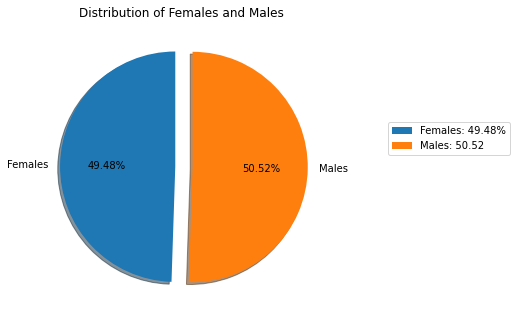

In [7]:
# How many females and males are represented in our dataset? What is the average cost per sex? 
sex_charges = zip(sex, charges)
charges_FM = list(sex_charges)
females = sex.count(0)
males = sex.count(1)
class Sex:
    def __init__(self, sex, charges_FM):
        self.sex = sex
        self.charges = charges_FM

    def FM_charges(self):
        f_charges = 0
        m_charges = 0
        for index, tuple in enumerate(self.charges):
            sexes = tuple[0]
            s_charge = tuple[1]
            if sexes == 0:
                f_charges += s_charge
            elif sexes == 1:
                m_charges += s_charge
        return f_charges, m_charges

Sex_Data = Sex(sex, charges_FM)
f_avg = Sex_Data.FM_charges()[0]/females
m_avg = Sex_Data.FM_charges()[1]/males

# Tabulate results
print('Males are charged an average of $1,387.17 more for insurance than females.')
sex_total_pct = [females/total_datapoints*100, males/total_datapoints*100]
sex_string = 'Total Females and Males with Avg. Cost'
Sex_Stats = [['', 'Total #', 'Average Cost'], ['Females', females, '${:2.2f}'.format(f_avg)], ['Males', males, '${:2.2f}'.format(m_avg)], ['Total/Difference', total_datapoints, '${:2.2f}'.format(abs(f_avg-m_avg))]]
print(sex_string.center(45) + '\n' + tabulate(Sex_Stats, headers='firstrow', tablefmt='fancy_grid'))

# Create pie chart visualization

sex_pct_labels = ['Females', 'Males']
s_labels = sex_pct_labels
s_values = sex_total_pct
s_legend = ['Females: 49.48%', 'Males: 50.52']
fig = plt.figure(figsize=(8, 8))
explode = (0.05, 0.1)
ax = fig.add_axes([.5, 0, .5, .5], aspect=1)
ax.pie(s_values, labels=s_labels, explode=explode, autopct='%2.2f%%', shadow=True, startangle=90, radius=1)
plt.legend(s_legend, loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1.2))
ax.set_title('Distribution of Females and Males')
plt.show()

Smokers are charged an average of $23615.96 more for insurance than nonsmokers.
Total Smokers v Nonsmokers and Avg. Cost
╒══════════════╤═══════════╤══════════════╤═══════════════╕
│              │ Smokers   │ Nonsmokers   │ Total/Diff.   │
╞══════════════╪═══════════╪══════════════╪═══════════════╡
│ Total        │ 274       │ 1064         │ 1338          │
├──────────────┼───────────┼──────────────┼───────────────┤
│ Average Cost │ $32050.23 │ $8434.27     │ $23615.96     │
╘══════════════╧═══════════╧══════════════╧═══════════════╛


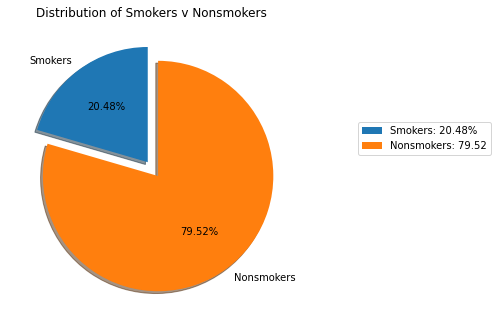

In [8]:
#Analyze smoker status and the charges associated with each one.
total_smokers = smoker.count(1)
total_nsmokers = smoker.count(0)
smoker_charges = zip(smoker, charges)
SMK_charges = list(smoker_charges)

class Smoker:
    def __init__(self, SMK_charges):
        self.smk_charges = SMK_charges
        
    def SMK_charges(self):
        smk_charges = 0
        NS_charges = 0
        for index, tuple in enumerate(self.smk_charges):
            smoker = tuple[0]
            charge = tuple[1]
            if smoker == 1:
                smk_charges += charge
            elif smoker == 0:
                NS_charges += charge
        return smk_charges, NS_charges

# Tabulate results
smoker_pct = [total_smokers/total_datapoints*100, total_nsmokers/total_datapoints*100]
Smoker_Data = Smoker(SMK_charges)
avg_smk = float(Smoker_Data.SMK_charges()[0]/total_smokers)
avg_NS = float(Smoker_Data.SMK_charges()[1]/total_nsmokers)
diff_smk = '${:2.2f}'.format(abs(avg_smk - avg_NS))
smoker_string = 'Total Smokers v Nonsmokers and Avg. Cost'
smoker_stats = [['', 'Smokers', 'Nonsmokers', 'Total/Diff.'], ['Total', total_smokers, total_nsmokers, total_datapoints], ['Average Cost', '${:2.2f}'.format((avg_smk)), '${:2.2f}'.format(avg_NS), diff_smk]]
print('Smokers are charged an average of {} more for insurance than nonsmokers.'.format(diff_smk))
print(smoker_string + '\n' + tabulate(smoker_stats, headers='firstrow', tablefmt='fancy_grid'))

# Pie Chart visualization

smk_pct_labels = ['Smokers', 'Nonsmokers']
smk_labels = smk_pct_labels
smk_values = smoker_pct
smk_legend = ['Smokers: 20.48%', 'Nonsmokers: 79.52']
fig = plt.figure(figsize=(8, 8))
explode = (0.05, 0.1)
ax = fig.add_axes([.5, 0, .5, .5], aspect=1)
ax.pie(smk_values, labels=smk_labels, explode=explode, autopct='%2.2f%%', shadow=True, startangle=90, radius=1)
plt.legend(smk_legend, loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1.2))
ax.set_title('Distribution of Smokers v Nonsmokers')
plt.show()

          Total Num. Patients Per Region          
╒═════════════╤═════════════╤═════════════╤═════════════╕
│   Northwest │   Southwest │   Southeast │   Northeast │
╞═════════════╪═════════════╪═════════════╪═════════════╡
│         325 │         325 │         364 │         324 │
╘═════════════╧═════════════╧═════════════╧═════════════╛


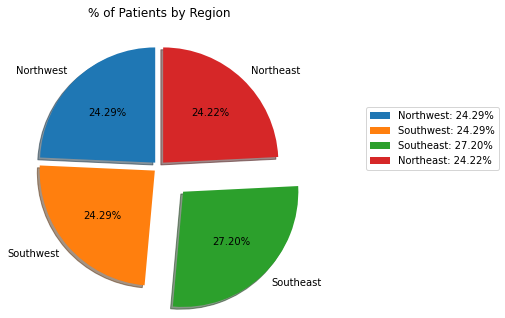

In [9]:
#Regional Data:
#Break down data into regions and analyze. 
#First determine the total number of patients per region.

Southwest = region.count('southwest')
Southeast = region.count('southeast')
Northwest = region.count('northwest')
Northeast = region.count('northeast')

reg_string = 'Total Num. Patients Per Region'
region_totals = (['Northwest', 'Southwest', 'Southeast', 'Northeast'], [Northwest, Southwest, Southeast, Northeast])
print(reg_string.center(50) + '\n' + tabulate(region_totals, headers='firstrow', tablefmt='fancy_grid'))

#Find percentage of patients per region.

reg_total_pct = []
reg_total_pct.append(Northwest/total_datapoints*100)
reg_total_pct.append(Southwest/total_datapoints*100)
reg_total_pct.append(Southeast/total_datapoints*100)
reg_total_pct.append(Northeast/total_datapoints*100)

# Pie chart for % of patients per region

data_pctlabels = ['Northwest', 'Southwest', 'Southeast', 'Northeast']
labels = data_pctlabels
values = reg_total_pct
legend = ['Northwest: 24.29%', 'Southwest: 24.29%', 'Southeast: 27.20%', 'Northeast: 24.22%']
fig = plt.figure(figsize=(8, 8))
explode = (0.05, 0.05, 0.3, 0.05)
ax = fig.add_axes([.875, 0, .5, .5], aspect=1)
ax.pie(values, labels=labels, explode=explode, autopct='%2.2f%%', shadow=True, startangle=90, radius=1)
plt.legend(legend, loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1.2))
ax.set_title('% of Patients by Region')
plt.show()

### Age Groups and Average Charges
The range for ages is 46 years with a maximum of 64 and minimum of 18. Divide the patients into age groups and calculate the average charges for each group.

The mean age is 39. Age groups will be defined in increments of 10. The standard deviation is approximately 14, so using increments of 10 will group high and low ouliers together.

               Age Groups and Average Charges               
╒═══════════════════╤═══════════════════╤═══════════════════╕
│ Age Group (yrs)   │ Number in Group   │ Average Charges   │
╞═══════════════════╪═══════════════════╪═══════════════════╡
│ 18 - 24           │ 278               │ $9011.34          │
├───────────────────┼───────────────────┼───────────────────┤
│ 25 - 34           │ 271               │ $10352.39         │
├───────────────────┼───────────────────┼───────────────────┤
│ 35 - 44           │ 260               │ $13134.17         │
├───────────────────┼───────────────────┼───────────────────┤
│ 45 - 54           │ 287               │ $15853.93         │
├───────────────────┼───────────────────┼───────────────────┤
│ 55 - 64           │ 242               │ $18513.28         │
├───────────────────┼───────────────────┼───────────────────┤
│ Population Avg    │                   │                   │
├───────────────────┼───────────────────┼───────────────────┤
│ 39.21  

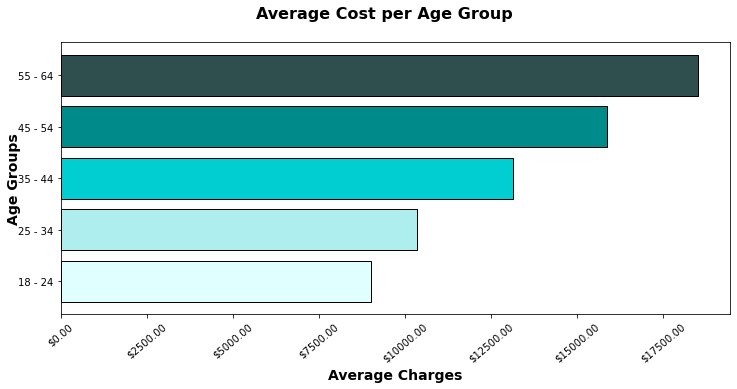

In [10]:
#Define age groups.
#How many patients are in each age group? What is the average cost of insurance per group?
#groupA = 18 - 24, groupB = 25 - 34, groupC = 35 - 44, groupD = 45 - 54, groupE = 55 - 64

groupA = []
groupB = []   
groupC = []
groupD = []
groupE = []

A_charges = []
B_charges = []
C_charges = []
D_charges = []
E_charges = []

# Function to get age and charges into correct groups.
def age_groups(d):
    for item in d:
        if int(item['age']) <= 24: 
            groupA.append(int(item['age']))
            A_charges.append(float(item['charges']))
        elif int(item['age']) > 24 and int(item['age']) <= 34:
            groupB.append(int(item['age']))
            B_charges.append(float(item['charges']))
        elif int(item['age']) > 34 and int(item['age']) <= 44:
            groupC.append(int(item['age']))
            C_charges.append(float(item['charges']))
        elif int(item['age']) > 44 and int(item['age']) <= 54:
            groupD.append(int(item['age']))
            D_charges.append(float(item['charges']))
        elif int(item['age']) > 54:
            groupE.append(int(item['age']))
            E_charges.append(float(item['charges']))

age_groups(ins_dict)

# Get number of patients per age group
A = len(groupA)
B = len(groupB)
C = len(groupC)
D = len(groupD)
E = len(groupE)

# Get average charges per age group
avg_A = float(sum(A_charges)/A)
avg_B = float(sum(B_charges)/B)
avg_C = float(sum(C_charges)/C)
avg_D = float(sum(D_charges)/D)
avg_E = float(sum(E_charges)/E)

# Tabulate results
age_groups = [['Age Group (yrs)', 'Number in Group', 'Average Charges'], ['18 - 24', A, '${:2.2f}'.format(avg_A)], ['25 - 34', B, '${:2.2f}'.format(avg_B)], ['35 - 44', C, '${:2.2f}'.format(avg_C)], ['45 - 54', D, '${:2.2f}'.format(avg_D)], ['55 - 64', E, '${:2.2f}'.format(avg_E)], ['Population Avg', '', ''], [39.21, 25, '$13,270.40']]
age_string = 'Age Groups and Average Charges'
print(age_string.center(60) + '\n' + tabulate(age_groups, headers='firstrow', tablefmt='fancy_grid'))

age_groups = ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64']
age_avg_cost = [avg_A, avg_B, avg_C, avg_D, avg_E]

# Create horizontal bar chart for visualization
fig, axs = plt.subplots(1, figsize=(12, 5))
axs.barh(age_groups, age_avg_cost, color=['lightcyan', 'paleturquoise', 'darkturquoise', 'darkcyan', 'darkslategray'], edgecolor='k')
fig.suptitle('Average Cost per Age Group', fontweight='bold', color='k', fontsize='16', horizontalalignment='center')
plt.xlabel('Average Charges', fontweight='bold', color = 'k', fontsize='14', horizontalalignment='center')
plt.ylabel('Age Groups', fontweight='bold', color='k', fontsize='14', verticalalignment='center')
axs.xaxis.set_major_formatter('${x:1.2f}')
plt.xticks(rotation=40)
plt.show()

### Average Charges per Number of Children
The range for number of children is 5 with close to half of the population having no children. Calculate the average charges per number of children.

The table shows that the cost of insurance increases with each additional child up to 3, then begins to decrease. This is better visualized with the bar chart. However, there is not enough data to support an accurate analysis on number of children as there are only 25 patients with 4 children and 18 patients with 5 children. The sample is not large enough to make a deduction.

        Average Cost for Num. Children       
╒══════════════════════╤═══════════╤═════════════╕
│ Number of Children   │           │ Avg. Cost   │
╞══════════════════════╪═══════════╪═════════════╡
│ No children          │ 574       │ $12365.98   │
├──────────────────────┼───────────┼─────────────┤
│ 1 child              │ 324       │ $12731.17   │
├──────────────────────┼───────────┼─────────────┤
│ 2 children           │ 240       │ $15073.56   │
├──────────────────────┼───────────┼─────────────┤
│ 3 children           │ 157       │ $15355.32   │
├──────────────────────┼───────────┼─────────────┤
│ 4 children           │  25       │ $13850.66   │
├──────────────────────┼───────────┼─────────────┤
│ 5 children           │  18       │ $8786.04    │
├──────────────────────┼───────────┼─────────────┤
│ Average              │   1.09492 │             │
╘══════════════════════╧═══════════╧═════════════╛


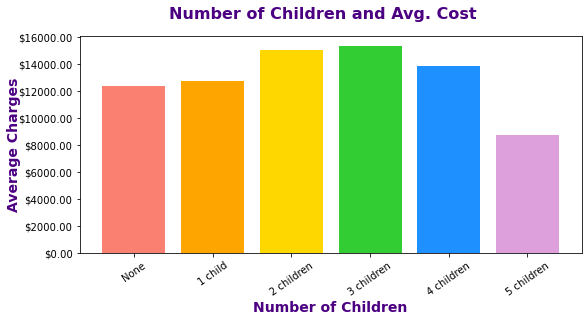

In [11]:
#Find total for number of children. What are the average charges per number of children?
group0 = []
group1 = []   
group2 = []
group3 = []
group4 = []
group5 = []

for x in children:
    if int(x) == 0: 
        group0.append(int(x))
    elif int(x) == 1:
        group1.append(int(x))
    elif int(x) == 2:
        group2.append(int(x))
    elif int(x) == 3:
        group3.append(int(x))
    elif int(x) == 4:
        group4.append(int(x))
    elif int(x) == 5:
        group5.append(int(x))

g0 = len(group0)
g1 = len(group1)
g2 = len(group2)
g3 = len(group3)
g4 = len(group4)
g5 = len(group5)

# Zip children and charges and use a class methond to get the average charges per number of children.
kid_charges = zip(children, charges)
Kid_Cost = list(kid_charges)

class kid_groups():
    def __init__(self, Kid_Cost):
        self.kid_cost = Kid_Cost
   
    def cost_kid(self):
        g0_charges = 0
        g1_charges = 0
        g2_charges = 0
        g3_charges = 0
        g4_charges = 0
        g5_charges = 0
        for index, tuple in enumerate(self.kid_cost):
            kid = tuple[0]
            charge = tuple[1]
            if kid in group0:
                g0_charges += charge
            elif kid in group1:
                g1_charges += charge
            elif kid in group2:
                g2_charges += charge
            elif kid in group3:
                g3_charges += charge
            elif kid in group4:
                g4_charges += charge
            elif kid in group5:
                g5_charges += charge
            group_charges = [g0_charges, g1_charges, g2_charges, g3_charges, g4_charges, g5_charges]
        return group_charges

Kid_ = kid_groups(Kid_Cost)

# Get average charges per number of children
avg_g0 = float(Kid_.cost_kid()[0]/g0)
avg_g1 = float(Kid_.cost_kid()[1]/g1)
avg_g2 = float(Kid_.cost_kid()[2]/g2)
avg_g3 = float(Kid_.cost_kid()[3]/g3)
avg_g4 = float(Kid_.cost_kid()[4]/g4)
avg_g5 = float(Kid_.cost_kid()[5]/g5)

# Tabulate results
kid_data = [['Number of Children', '', 'Avg. Cost'], ['No children', g0, '${:2.2f}'.format(avg_g0)], ['1 child', g1, '${:2.2f}'.format(avg_g1)], ['2 children', g2, '${:2.2f}'.format(avg_g2)], ['3 children', g3, '${:2.2f}'.format(avg_g3)], ['4 children', g4, '${:2.2f}'.format(avg_g4)], ['5 children', g5, '${:2.2f}'.format(avg_g5)], ['Average', statistics.mean(children)]]
kid_string = 'Average Cost for Num. Children'
print(kid_string.center(45) + '\n'+ tabulate(kid_data, headers='firstrow', tablefmt='fancy_grid'))

Num_children = ['None', '1 child', '2 children', '3 children', '4 children', '5 children']
avg_child_cost = [avg_g0, avg_g1, avg_g2, avg_g3, avg_g4, avg_g5]

# Bar chart visualization
fig, axs = plt.subplots(1, figsize=(9, 4))
axs.bar(Num_children, avg_child_cost, color=['salmon', 'orange', 'gold', 'limegreen', 'dodgerblue', 'plum'])
fig.suptitle('Number of Children and Avg. Cost', fontweight='bold', color='indigo', fontsize='16', horizontalalignment='center')
plt.xticks(rotation=35)
plt.xlabel('Number of Children', fontweight='bold', color='indigo', fontsize='14', horizontalalignment='center')
plt.ylabel('Average Charges', fontweight='bold', color='indigo', fontsize='14', verticalalignment='center')
axs.yaxis.set_major_formatter('${x:1.2f}')
plt.show()

### Average Cost per BMI Weight Status

#### According to the CDC and WHO, BMI calculations are standardized and categorized for adults over the age of 19. The BMI for children and teens aged 5-19 is calculated similarly to adults, but scaled based on standard deviation of the BMI measurement. Since the methodology of collecting the data is unknown, I will include those measurements in my analysis as if they are in the adult age range of 20 years or older.

"For adults **20 years old and older**, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

The standard weight status categories associated with BMI ranges for adults are shown in the following table."

![bmi_image](https://www.ncbi.nlm.nih.gov/books/NBK535456/bin/bmi__WHO.jpg)

        Average Cost per BMI category        
╒════════════════╤══════════╤═════════════╤═════════════════╕
│ BMI Category   │          │ Avg. Cost   │ Diff. in Cost   │
╞════════════════╪══════════╪═════════════╪═════════════════╡
│ Underweight    │  20      │ $8852.20    │ $1527.30        │
├────────────────┼──────────┼─────────────┼─────────────────┤
│ Normal         │ 222      │ $10379.50   │ -               │
├────────────────┼──────────┼─────────────┼─────────────────┤
│ Overweight     │ 380      │ $11006.81   │ $627.31         │
├────────────────┼──────────┼─────────────┼─────────────────┤
│ Obese: Class 1 │ 397      │ $14217.62   │ $3838.12        │
├────────────────┼──────────┼─────────────┼─────────────────┤
│ Obese: Class 2 │ 226      │ $17245.41   │ $6865.91        │
├────────────────┼──────────┼─────────────┼─────────────────┤
│ Obese: Class 3 │  93      │ $16667.61   │ $6288.11        │
├────────────────┼──────────┼─────────────┼─────────────────┤
│ Average        │  30.6

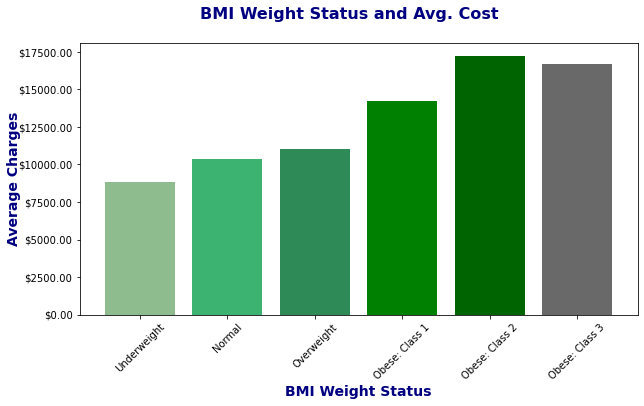

As expected, as BMI increases so do average charges. However, the table shows that patients in the Obese: Class 3 category paid less than those in the Obese: Class 2 category.


In [12]:
#Analyze BMI: Place each patient in the correct Weight Status according to BMI.
#Calculate the average cost of insurance in each Weight Status.

under = []
normal = []   
over = []
obese1 = []
obese2 = []
obese3 = []
for x in bmi:
    if x < 18.5: 
        under.append(x)
    elif x >= 18.5 and x <= 24.9:
        normal.append(x)
    elif x > 24.9 and x <= 29.9:
        over.append(x)
    elif x > 29.9 and x <= 34.9:
        obese1.append(x)
    elif x > 34.9 and x <= 39.9:
        obese2.append(x)
    elif x > 39.9:
        obese3.append(x)

num_un = len(under)
num_norm = len(normal)
num_over = len(over)
num_ob1 = len(obese1)
num_ob2 = len(obese2)
num_ob3 = len(obese3)

bmi_charges = zip(bmi, charges)
BMI_Cost = list(bmi_charges)


class bmi_groups():
    def __init__(self, BMI_Cost):
        self.bmi_cost = BMI_Cost
   
    def cost_bmi(self):
        un_charges = 0
        norm_charges = 0
        over_charges = 0
        ob1_charges = 0
        ob2_charges = 0
        ob3_charges = 0
        for index, tuple in enumerate(self.bmi_cost):
            bmi = tuple[0]
            charge = tuple[1]
            if bmi in under:
                un_charges += charge
            elif bmi in normal:
                norm_charges += charge
            elif bmi in over:
                over_charges += charge
            elif bmi in obese1:
                ob1_charges += charge
            elif bmi in obese2:
                ob2_charges += charge
            elif bmi in obese3:
                ob3_charges += charge
            group_charges = [un_charges, norm_charges, over_charges, ob1_charges, ob2_charges, ob3_charges]
        return group_charges

BMI_ = bmi_groups(BMI_Cost)
avg_un = float(BMI_.cost_bmi()[0]/num_un)
avg_norm = float(BMI_.cost_bmi()[1]/num_norm)
avg_over = float(BMI_.cost_bmi()[2]/num_over)
avg_ob1 = float(BMI_.cost_bmi()[3]/num_ob1)
avg_ob2 = float(BMI_.cost_bmi()[4]/num_ob2)
avg_ob3 = float(BMI_.cost_bmi()[5]/num_ob3)

diff = ['${:2.2f}'.format(abs(avg_norm - avg_un)), '-', '${:2.2f}'.format(abs(avg_norm - avg_over)), '${:2.2f}'.format(abs(avg_norm - avg_ob1)), '${:2.2f}'.format(abs(avg_norm - avg_ob2)), '${:2.2f}'.format(abs(avg_norm - avg_ob3))]

bmi_data = [['BMI Category', '', 'Avg. Cost', 'Diff. in Cost'], ['Underweight', num_un, '${:2.2f}'.format(avg_un), diff[0]], ['Normal', num_norm, '${:2.2f}'.format(avg_norm),diff[1]], ['Overweight', num_over, '${:2.2f}'.format(avg_over), diff[2]], ['Obese: Class 1', num_ob1, '${:2.2f}'.format(avg_ob1), diff[3]], ['Obese: Class 2', num_ob2, '${:2.2f}'.format(avg_ob2), diff[4]], ['Obese: Class 3', num_ob3, '${:2.2f}'.format(avg_ob3), diff[5]], ['Average', statistics.mean(bmi), '${:2.2f}'.format(statistics.mean(charges)), ""]]

bmi_string = 'Average Cost per BMI category'

print(bmi_string.center(45) + '\n'+ tabulate(bmi_data, headers='firstrow', tablefmt='fancy_grid'))

BMI_categories = ['Underweight', 'Normal', 'Overweight', 'Obese: Class 1', 'Obese: Class 2', 'Obese: Class 3']
BMI_avg_cost = [avg_un, avg_norm, avg_over, avg_ob1, avg_ob2, avg_ob3]

fig, axs = plt.subplots(1, figsize=(10, 5))
axs.bar(BMI_categories, BMI_avg_cost, color=['darkseagreen', 'mediumseagreen', 'seagreen', 'green', 'darkgreen', 'dimgray'])
fig.suptitle('BMI Weight Status and Avg. Cost', fontweight='bold', color='navy', fontsize='16', horizontalalignment='center')
plt.xlabel('BMI Weight Status', fontweight='bold', color='navy', fontsize='14', horizontalalignment='center')
plt.ylabel('Average Charges', fontweight='bold', color='navy', fontsize='14', verticalalignment='center')
plt.xticks(rotation=45)
axs.yaxis.set_major_formatter('${x:1.2f}')
plt.show()

print('As expected, as BMI increases so do average charges. However, the table shows that patients in the Obese: Class 3 category paid less than those in the Obese: Class 2 category.')

### Number of Children per Age Group
How are the number of children distributed among the population by age? 

In [13]:
# Bring down Age Groups from previous calculations.

# Age groups.
groupA
groupB
groupC
groupD
groupE

# zip the age & children variables.
age_children = zip(age_str, children_str)
age_child = list(age_children)

# Create a function that will find the age and add the children to the appropriate age group.
def age_count_kids():
    A_kids = []
    B_kids = []
    C_kids = []
    D_kids = []
    E_kids = []
    
    for index, tuple in enumerate(age_child):
        age = tuple[0]
        kids = tuple[1]
        if int(age) in groupA:
            A_kids.append(int(kids))
        elif int(age) in groupB:
            B_kids.append(int(kids))
        elif int(age) in groupC:
            C_kids.append(int(kids))
        elif int(age) in groupD:
            D_kids.append(int(kids))
        elif int(age) in groupE:
            E_kids.append(int(kids))
    return A_kids, B_kids, C_kids, D_kids, E_kids

A_kids = age_count_kids()[0]
B_kids = age_count_kids()[1]
C_kids = age_count_kids()[2]
D_kids = age_count_kids()[3]
E_kids = age_count_kids()[4]

# Create a function to iterate over the list of num_children in each age group and place that count in the correct Age group/Num. children list.
def count_(y):
    for z in y:
        x = []
        x.append(y.count(0))
        x.append(y.count(1))
        x.append(y.count(2))
        x.append(y.count(3))
        x.append(y.count(4))
        x.append(y.count(5))
    return x

A_ = count_(A_kids)
B_ = count_(B_kids)
C_ = count_(C_kids)
D_ = count_(D_kids)
E_ = count_(E_kids)

#Create function to get average number of children in each age group.
def avg_num_kids(x):
    z = sum(x)
    w = len(x)
    avg = float(z/w)
    return '{:2.2f}'.format(avg)

avg_A = avg_num_kids(A_kids)
avg_B = avg_num_kids(B_kids)
avg_C = avg_num_kids(C_kids)
avg_D = avg_num_kids(D_kids)
avg_E = avg_num_kids(E_kids)

A_.append(avg_A)
B_.append(avg_B)
C_.append(avg_C)
D_.append(avg_D)
E_.append(avg_E)

A_.append(sum(A_kids))
B_.append(sum(B_kids))
C_.append(sum(C_kids))
D_.append(sum(D_kids))
E_.append(sum(E_kids))

counts = [A_, B_, C_, D_, E_]

# Tabulate findings.
rowIDs = ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64']
headers = ['Age Groups', '0', '1', '2', '3', '4', '5', 'Avg.', 'Total']
age_children_string = 'Number of Children per Age Group'
age_kids_tab = tabulate(counts, headers=headers, showindex=rowIDs, tablefmt='fancy_grid')
print(age_children_string + '\n' + age_kids_tab)

Number of Children per Age Group
╒══════════════╤═════╤═════╤═════╤═════╤═════╤═════╤════════╤═════════╕
│ Age Groups   │   0 │   1 │   2 │   3 │   4 │   5 │   Avg. │   Total │
╞══════════════╪═════╪═════╪═════╪═════╪═════╪═════╪════════╪═════════╡
│ 18 - 24      │ 188 │  42 │  27 │  15 │   3 │   3 │   0.6  │     168 │
├──────────────┼─────┼─────┼─────┼─────┼─────┼─────┼────────┼─────────┤
│ 25 - 34      │  90 │  78 │  57 │  35 │   6 │   5 │   1.28 │     346 │
├──────────────┼─────┼─────┼─────┼─────┼─────┼─────┼────────┼─────────┤
│ 35 - 44      │  58 │  82 │  72 │  36 │   6 │   6 │   1.49 │     388 │
├──────────────┼─────┼─────┼─────┼─────┼─────┼─────┼────────┼─────────┤
│ 45 - 54      │  82 │  86 │  60 │  48 │   7 │   4 │   1.39 │     398 │
├──────────────┼─────┼─────┼─────┼─────┼─────┼─────┼────────┼─────────┤
│ 55 - 64      │ 156 │  36 │  24 │  23 │   3 │   0 │   0.68 │     165 │
╘══════════════╧═════╧═════╧═════╧═════╧═════╧═════╧════════╧═════════╛


Patients aged 45 - 54 have the most children at 398 total children, but only average 1.39 children per patient compared to patients aged 35 - 44 who have the highest average number of children at 1.49 children per patient. 

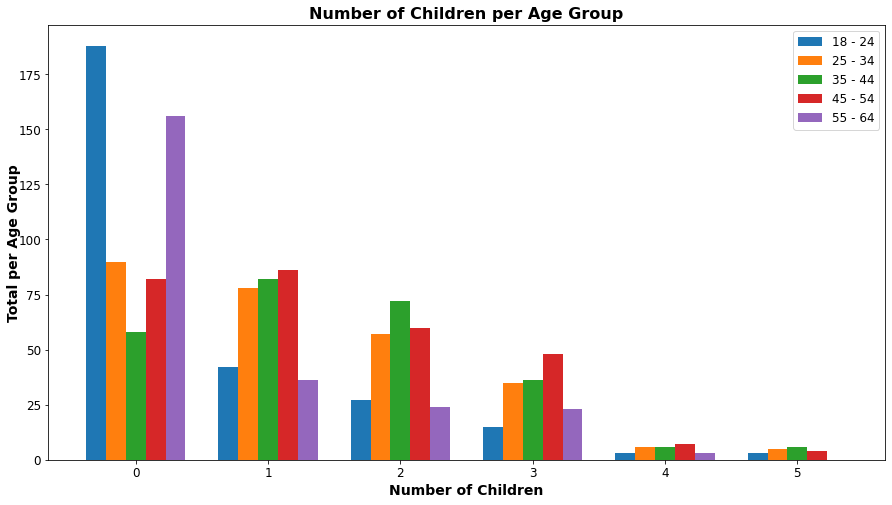

In [14]:
#Visualize number of children per age group
A_
B_
C_
D_
E_

a = [A_[0], A_[1], A_[2], A_[3], A_[4], A_[5]]
b = [B_[0], B_[1], B_[2], B_[3], B_[4], B_[5]]
c = [C_[0], C_[1], C_[2], C_[3], C_[4], C_[5]]
d = [D_[0], D_[1], D_[2], D_[3], D_[4], D_[5]]
e = [E_[0], E_[1], E_[2], E_[3], E_[4], E_[5]]

w=0.15

labels = [0, 1, 2, 3, 4, 5]
z = np.arange(len(labels))
z1 = [x + w for x in z]
z2 = [x + w for x in z1]
z3 = [x + w for x in z2]
z4 = [x + w for x in z3]
x = [x for x in z2]

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(z, a, w, label='18 - 24')
rects2 = ax.bar(z1, b, w, label='25 - 34')
rects3 = ax.bar(z2, c, w, label='35 - 44')
rects4 = ax.bar(z3, d, w, label='45 - 54')
rects5 = ax.bar(z4, e, w, label='55 - 64')

plt.xlabel('Number of Children')
plt.ylabel('')
plt.title('Number of Children per Age Group', fontweight='bold', color='k', fontsize='16', horizontalalignment='center')
plt.xticks(x, labels, fontsize='12')
plt.yticks(fontsize='12')
plt.xlabel('Number of Children', fontweight='bold', color='k', fontsize='14', horizontalalignment='center')
plt.ylabel('Total per Age Group', fontweight='bold', color='k', fontsize='14', verticalalignment='center')
plt.legend(fontsize='12')
plt.show()

### Affects of Number of Children and Insurance Costs
I am interested to see how having children impacts insurance costs for males and females. 

Using the average BMI and Age in the population and filtering the data by smoker status the affects of number of children on insurance costs can be closely examined.

Average Age = 39.21  I will use my previously defined age group of 35 - 44 years old (groupC).

Average BMI = 30.66  This is between overweight and obese: class 1, so I will use patients from both the overweight (25 - 29.9) and obese: class 1 (30 - 34.9) categories. (over and obese1)

Describe the difference in costs for males v females and number of children.

In [15]:
groupC
over
obese1

#Non-smokers in groupC:
NS = []
for item in ins_dict:
    if int(item['age']) in groupC and item['smoker'] == 'no':
        NS.append(item)
        
# Female & Male samples
Female_sample = []
Male_sample = []
for item in NS:
    x = float(item['bmi'])
    if x in over or x in obese1 and item['sex'] == 'female':
        Female_sample.append(item)
    elif x in over or x in obese1 and item['sex'] == 'male':
        Male_sample.append(item)

# Create DataFrame objects for each sample just for ease of use to check for correct data.
Female_df = pd.DataFrame(Female_sample)
Male_df = pd.DataFrame(Male_sample) 
        
# Function to separate patients into appropriate groups by number of children.
def num_children(d, x):
    for item in d:
        if int(item['children']) == 0:
            x[0].append(item)
        elif int(item['children']) == 1:
            x[1].append(item)
        elif int(item['children']) == 2:
            x[2].append(item)
        elif int(item['children']) == 3:
            x[3].append(item)
        elif int(item['children']) == 4:
            x[4].append(item)
        elif int(item['children']) == 5:
            x[5].append(item)

fem_children = [[], [], [], [], [], []]
male_children = [[], [], [], [], [], []]

# Call function for each group
num_children(Female_sample, fem_children)
num_children(Male_sample, male_children)

# Get average cost and standard deviation for each group.
f_0_df = pd.DataFrame(fem_children[0])
f_1_df = pd.DataFrame(fem_children[1])
f_2_df = pd.DataFrame(fem_children[2])
f_3_df = pd.DataFrame(fem_children[3])
f_4_df = pd.DataFrame(fem_children[4])
f_5_df = pd.DataFrame(fem_children[5])

m_0_df = pd.DataFrame(male_children[0])
m_1_df = pd.DataFrame(male_children[1])
m_2_df = pd.DataFrame(male_children[2])
m_3_df = pd.DataFrame(male_children[3])
m_4_df = pd.DataFrame(male_children[4])
m_5_df = pd.DataFrame(male_children[5])

f_means_ = [6497.82, 6510.14, 8348.65, 7409.08, 10194.97, 10765.85]
f_std_ = [3159.14, 863.25, 5635.76, 830.00, 4880.91, 3230.28]

m_means_ = [5417.47, 5984.58, 8247.26, 7047.10, 8162.72, 0]
m_std_ = [852.44, 852.04, 4886.82, 1256.66, 0, 0]

means_diff = []
means_diff.append(['${:2.2f}'.format(f_means_[0] - m_means_[0])])
means_diff.append(['${:2.2f}'.format(f_means_[1] - m_means_[1])])
means_diff.append(['${:2.2f}'.format(f_means_[2] - m_means_[2])])
means_diff.append(['${:2.2f}'.format(f_means_[3] - m_means_[3])])
means_diff.append(['${:2.2f}'.format(f_means_[4] - m_means_[4])])
means_diff.append(['no data to support'])


rowIDs = [ 0, 1, 2, 3, 4, 5]
headers = ['Children','Difference']
diff_means_ = tabulate(means_diff, headers=headers, showindex=rowIDs, tablefmt='fancy_grid')
print("Difference in Cost per Number of Children" + '\n' + diff_means_)

Difference in Cost per Number of Children
╒════════════╤════════════════════╕
│   Children │ Difference         │
╞════════════╪════════════════════╡
│          0 │ $1080.35           │
├────────────┼────────────────────┤
│          1 │ $525.56            │
├────────────┼────────────────────┤
│          2 │ $101.39            │
├────────────┼────────────────────┤
│          3 │ $361.98            │
├────────────┼────────────────────┤
│          4 │ $2032.25           │
├────────────┼────────────────────┤
│          5 │ no data to support │
╘════════════╧════════════════════╛


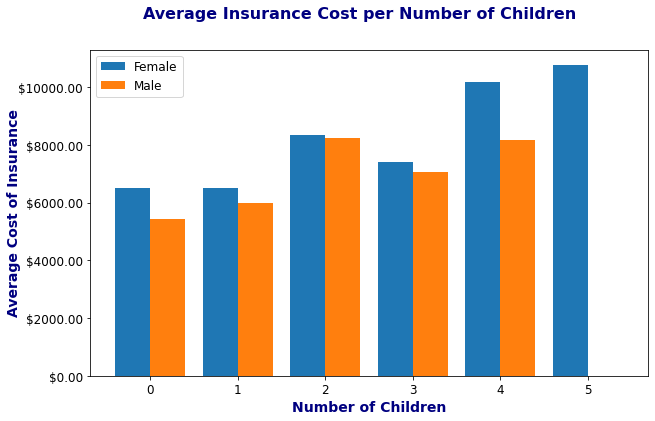

In [16]:
# Plot the data for males and females that meet the criteria.
w=0.4
z=0.2

x = [0, 1, 2, 3, 4, 5]
bar1 = [0, 1, 2, 3, 4, 5]
fig, axs = plt.subplots(figsize=(10, 6))
plt.bar(bar1, f_means_, w, label='Female')
bar3 = [i+z for i in bar1]
bar2 = [i+w for i in bar1]
plt.bar(bar2, m_means_, w, label='Male')
fig.suptitle('Average Insurance Cost per Number of Children', fontweight='bold', color='navy', fontsize='16', horizontalalignment='center')
plt.xlabel('Number of Children', fontweight='bold', color='navy', fontsize='14', horizontalalignment='center')
plt.ylabel('Average Cost of Insurance', fontweight='bold', color='navy', fontsize='14', verticalalignment='center')
plt.yticks(fontsize='12')
axs.yaxis.set_major_formatter('${x:1.2f}')
plt.xticks(bar3, x, fontsize='12')
plt.legend(fontsize='12')
plt.show()

I expected males to be charged more for insurance overall, however it looks like females are charged more for insurance when considering the affects of number of children. 
Females with 2 children are charged an average of only 101.39 dollars more than males with 2 children. While females with 4 children are charged an average of $2,032.25 more than males with 4 children. 

### Smoking Cessation Incentive Program
The average cost of insurance for smokers is $23,615.96 more than for non-smokers! Although the damage is done, smokers who complete a smoking cessation program and successfully quit smoking deserve a break. Insurance companies take great risk insuring smokers knowing the health issues that could arise from smoking. Creating an incentive program for smokers to quit smoking will lower risk for insurance companies, save smokers some money, and possibly lead them to a healthier lifestyle!

What would the new difference in cost be if all of the smokers in our list of patients successfully quit smoking? 
In previous Python projects we estimated insurance costs using the following formula:

current estimated insurance cost: (250 * age - 128 * sex + 370 * bmi + 425 * num_of_children + 24000 * smoker - 12500)

Reduce the variable for smoker by 1/3 in the estimated annual insurance cost equation.

proposed estimated insurance cost: (250 * age - 128 * sex + 370 * bmi + 425 * num_of_children + 24000 - 1/3(24000) * smoker - 12500)

Is there a difference between the actual cost and the new estimate? What is the estimated savings for smokers who complete the smoking cessation program?

In [17]:
# Create new dictionary for smokers only.
with open('insurance.csv') as ins_data:
  new_dict = []
  for line in csv.DictReader(ins_data):
    new_dict.append(line)

#print(new_dict[:5])
new2 = [x for x in new_dict if x['smoker'] == 'yes']
#print(new2[:5])
smoker_dict = []
for x in new2:
    x.pop('region')
    x.pop('smoker')
    smoker_dict.append(x)

# Change key['sex'] value to integer:
for item in smoker_dict:
    if item['sex'] == 'female':
        item['sex'] = 0
    elif item['sex'] == 'male':
        item['sex'] = 1

In [18]:
# Using the proposed estimated insurance cost formula, calculate the differences in estimated cost, proposed estimated cost, and actual cost.
# Since all patients in the smoker_dict are smokers, the formula has been modified to represent smokers as the integer 1.
  
#proposed_estimate = (250*age - 128*sex + 370*bmi + 425*children + 24000-(1/3*24000)*1 - 12500)
for item in smoker_dict:
    a = int(item['age'])
    b = item['sex']
    c = float(item['bmi'])
    d = int(item['children'])
    e = float(item['charges'])
    item.update({'current_est': '{:2.2f}'.format(250*a - 128*b + 370*c + 425*d + 24000*1 - 12500)})
    item.update({'prop_1/3': '{:2.2f}'.format(250*a - 128*b + 370*c + 425*d + 24000 - (1/3*24000) - 12500)})
    item.update({'diff_est': '{:2.2f}'.format(abs(float(item['current_est']) - float(item['prop_1/3'])))})
    item.update({'diff': '{:2.2f}'.format(abs(e - float(item['prop_1/3'])))})

#Tabulate average costs and savings for the smokers.
prop_str = []
diff_est_str = []
current_est_str = []
prop_ = 0
diff_est = 0
current_est = 0

for item in smoker_dict:
    prop_str.append(item['prop_1/3'])
    diff_est_str.append(item['diff_est'])
    current_est_str.append(item['current_est'])

for x in prop_str:
    prop_ += float(x)
for x in diff_est_str:
    diff_est += float(x)
for x in current_est_str:
    current_est += float(x)
    
avg_actual = avg_smk
avg_current_est = current_est/len(smoker_dict)
avg_prop_ = prop_/len(smoker_dict)
avg_est_diff = diff_est/len(smoker_dict)
avg_actual_vprop = ((avg_prop_ - avg_actual))

#smoker_dict_str = 'Average Estimated Cost, AvProposed Estimate, and Actual Cost with Differences'      
smoker_incentive_data = [['${:2.2f}'.format(avg_actual)], ['${:2.2f}'.format(avg_current_est)], ['${:2.2f}'.format(avg_prop_)], ['${:2.2f}'.format(avg_est_diff)], ['${:2.2f}'.format(avg_actual_vprop)]]
labels = ['Avg. Actual Cost', 'Avg. Estimated', 'Avg. Proposed', 'Avg. Estimated Savings', 'Diff in Actual v Proposed']
smoker_incentive_tab = tabulate(smoker_incentive_data, showindex=labels, tablefmt='fancy_grid')
smoker_incentive_str = 'Difference in Estimated Costs after Smoker Incentive Program'
print(smoker_incentive_str + '\n' + smoker_incentive_tab)

Difference in Estimated Costs after Smoker Incentive Program
╒═══════════════════════════╤═══════════╕
│ Avg. Actual Cost          │ $32050.23 │
├───────────────────────────┼───────────┤
│ Avg. Estimated            │ $32889.58 │
├───────────────────────────┼───────────┤
│ Avg. Proposed             │ $24889.58 │
├───────────────────────────┼───────────┤
│ Avg. Estimated Savings    │ $8000.00  │
├───────────────────────────┼───────────┤
│ Diff in Actual v Proposed │ $-7160.65 │
╘═══════════════════════════╧═══════════╛


Smokers who complete a smoking cessation program and successfully quit smoking could save an average of $7,160.65 on their annual insurance costs with the new Smoker Incentive Program. This program could save smokers money and make them healthier, and save insurance companies money by lowering their risk on insured smokers. Perhaps those smokers could further be incentivized to stay smoke free by further lowering the variable for smokers in small increments for each year that they stay smoke free.

## Conclusions
There are several variables that affect the cost of insurance. Some of those variables can be controlled by the individual patient like BMI weight status and whether a person chooses to smoke tobacco products. Some variables cannot be controlled such as age. 

In my analysis of insurance costs, I found that the number of children a person has affects the amount they have to pay for insurance. I do not know what method was used to calculate the insurance costs in the dataset. Suppose the insurance costs in the dataset included insurance coverage for children? That might explain the discrepancy in costs of patients with children and patients without children. If the costs do not include coverage for children, then there are some issues with the method for calculating insurance costs. Females do not have an advantage in the estimated insurance cost formula (- sex factor *128, sex factor for females is 0) and it appears that they are charged more for the number of children they have than males. The question remains: Why are the number of children a patient has factored into the cost of insurance if the total cost does not include the price of coverage for the children? More transparency on the method for calculating insurance costs is needed to further analyze this issue.

I created a scenario where an insurance company could incentivize smokers to complete a smoking cessation program to save them money and improve their health. The results show that smokers could save over $7,000 each year on insurance if they quit smoking. Insurance companies might lower their risk of insuring smokers if they implemented such a program. However, insurance companies might also stand to lose money by lowering the rates of smokers who complete the program. If insurance companies and doctors work together on the implementation of a smoking cessation program, then both entities might make up for their losses by taking a cut of the profits from the program. 

#### For extra practice writing csv files and analyzing data: analyze insurance data for each region.

In [19]:
#1. Use a quick loop for regional data that puts each patient in the correct region. 

NW_patients = []
SW_patients = []
SE_patients = []
NE_patients = []
for item in ins_dict:
    if item['region'] == 'northwest':
        NW_patients.append(item)
    elif item['region'] == 'southwest':
        SW_patients.append(item)
    elif item['region'] == 'southeast':
        SE_patients.append(item)
    elif item['region'] == 'northeast':
        NE_patients.append(item)
        
Regions = [NW_patients, SW_patients, SE_patients, NE_patients]

In [20]:
#2. Convert patient data by region to .csv files for pandas to analyze.
with open('NW.csv', 'w') as csvfile:
    fieldnames = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for item in NW_patients:
        item['age'] = int(item['age'])
        item['sex'] = item['sex']
        item['bmi'] = float(item['bmi'])
        item['children'] = int(item['children'])
        item['smoker'] = item['smoker']
        item['region'] = item['region']
        item['charges'] = float(item['charges'])
        writer.writerow(item)

with open('SW.csv', 'w') as csvfile:
    fieldnames = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for item in SW_patients:
        item['age'] = int(item['age'])
        item['sex'] = item['sex']
        item['bmi'] = float(item['bmi'])
        item['children'] = int(item['children'])
        item['smoker'] = item['smoker']
        item['region'] = item['region']
        item['charges'] = float(item['charges'])
        writer.writerow(item)
        
with open('SE.csv', 'w') as csvfile:
    fieldnames = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for item in SE_patients:
        item['age'] = int(item['age'])
        item['sex'] = item['sex']
        item['bmi'] = float(item['bmi'])
        item['children'] = int(item['children'])
        item['smoker'] = item['smoker']
        item['region'] = item['region']
        item['charges'] = float(item['charges'])
        writer.writerow(item)
        
with open('NE.csv', 'w') as csvfile:
    fieldnames = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for item in NE_patients:
        item['age'] = int(item['age'])
        item['sex'] = item['sex']
        item['bmi'] = float(item['bmi'])
        item['children'] = int(item['children'])
        item['smoker'] = item['smoker']
        item['region'] = item['region']
        item['charges'] = float(item['charges'])
        writer.writerow(item)

In [21]:
#3. Create pandas DataFrames by region in order to analyze and compare the data.
NW_df = pd.read_csv('NW.csv')
SW_df = pd.read_csv('SW.csv')
SE_df = pd.read_csv('SE.csv')
NE_df = pd.read_csv('NE.csv')

reg_dfs = [NW_df, SW_df, SE_df, NE_df]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#recycle description function:
def desc_reg(df):
    df1 = df.describe().append((df.mode()).rename(index={0:'mode'}))
    df1.loc['range'] = df1.loc['max'] - df1.loc['min']
    return df1

label = ('age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region')  
rowIDs = ['Northwest', 'Southwest', 'Southeast', 'Northeast']
stats = ('count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode', 'range')

#tabulate data for each category.
age_tab = [[x for x in stats], desc_reg(NW_df['age']), desc_reg(SW_df['age']), desc_reg(SE_df['age']), desc_reg(NE_df['age'])]
bmi_tab = [[x for x in stats], desc_reg(NW_df['bmi']), desc_reg(SW_df['bmi']), desc_reg(SE_df['bmi']), desc_reg(NE_df['bmi'])]
kids_tab = [[x for x in stats], desc_reg(NW_df['children']), desc_reg(SW_df['children']), desc_reg(SE_df['children']), desc_reg(NE_df['children'])]
charges_tab = [[x for x in stats], desc_reg(NW_df['charges']), desc_reg(SW_df['charges']), desc_reg(SE_df['charges']), desc_reg(NE_df['charges'])]

#Titles for tabulated data
string_A = 'Regional Statistics by Age'
string_B = 'Regional Statistics by BMI'
string_K = 'Regional Statistics by Num. Children'
string_CH = 'Regional Statistics by Charges'

print(string_A.center(100) + '\n' + tabulate(age_tab, headers='firstrow', showindex=rowIDs, tablefmt='fancy_grid'))
print(string_B.center(100) + '\n' + tabulate(bmi_tab, headers='firstrow', showindex=rowIDs, tablefmt='fancy_grid'))
print(string_K.center(100) + '\n' + tabulate(kids_tab, headers='firstrow', showindex=rowIDs, tablefmt='fancy_grid'))
print(string_CH.center(100) + '\n' + tabulate(charges_tab, headers='firstrow', showindex=rowIDs, tablefmt='fancy_grid'))

                                     Regional Statistics by Age                                     
╒═══════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╤════════╤═════════╕
│           │   count │    mean │     std │   min │   25% │   50% │   75% │   max │   mode │   range │
╞═══════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╪════════╪═════════╡
│ Northwest │     325 │ 39.1969 │ 14.0516 │    19 │ 26    │  39   │    51 │    64 │     19 │      45 │
├───────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼────────┼─────────┤
│ Southwest │     325 │ 39.4554 │ 13.9599 │    19 │ 27    │  39   │    51 │    64 │     19 │      45 │
├───────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼────────┼─────────┤
│ Southeast │     364 │ 38.9396 │ 14.1646 │    18 │ 26.75 │  39   │    51 │    64 │     18 │      46 │
├───────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼───────┼

In [22]:
#4.Tabulate data for sex and smokers by region.

#get sex stats
Pop_sex = Population_df[['sex']].describe()
NW_sex = NW_df[['sex']].describe()
SW_sex = SW_df[['sex']].describe()
SE_sex = SE_df[['sex']].describe()
NE_sex = NE_df[['sex']].describe()
Reg_sex_desc = [Pop_sex, NW_sex, SW_sex, SE_sex, NE_sex]

Non_Num_Sex = []
for x in Reg_sex_desc:
    x.reset_index()
    x.to_string(header=None, index=None)
    Non_Num_Sex.append(x)

#get smoker stats
Pop_smk = Population_df[['smoker']].describe()
NW_smk = NW_df[['smoker']].describe()
SW_smk = SW_df[['smoker']].describe()
SE_smk = SE_df[['smoker']].describe()
NE_smk = NE_df[['smoker']].describe()
Reg_smk_desc = [Pop_smk, NW_smk, SW_smk, SE_smk, NE_smk]

Non_Num_Smk = []
for x in Reg_smk_desc:
    x.loc['num. smokers'] = x.loc['count'] - x.loc['freq']
    x.reset_index()
    x.to_string(header=None, index=None)
    Non_Num_Smk.append(x)    

nonnum_string = 'Population v Region Stats for Sex & Smoker Status'
P_R_NonNum_Stats = (['Population v Region: Sex', '', '', '', ''], ['Population','Northwest', 'Southwest', 'Southeast', 'Northeast'], [x for x in Non_Num_Sex], ['Population v Region: Smoker', '', '', '', ''], ['Population','Northwest', 'Southwest', 'Southeast', 'Northeast'], [x for x in Non_Num_Smk])
print(nonnum_string + '\n' + tabulate(P_R_NonNum_Stats, headers='firstrow', tablefmt='fancy_grid'))

Population v Region Stats for Sex & Smoker Status
╒═════════════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ Population v Region: Sex    │                     │                     │                     │                     │
╞═════════════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╪═════════════════════╡
│ Population                  │ Northwest           │ Southwest           │ Southeast           │ Northeast           │
├─────────────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ sex                         │ sex                 │ sex                 │ sex                 │ sex                 │
│ count   1338                │ count      325      │ count    325        │ count    364        │ count    324        │
│ unique     2                │ unique       2      │ unique     2        │ unique     2        │ unique     2

The Southeast region has the highest average BMI and highest number of smokers, while the Northwest region has the lowest average BMI and number of smokers. Based on average BMI and number of smokers, the Southeast region is most unhealthy, and the Northwest region is most healthy.

## Review of Objectives
### Personal Goals:
####    ✅  1. Organize data into usable variables for analysis. 
            I created variables for each column in the dataset and was able to call those variables when I needed to.
####    ✅  2. Learn how to present my findings in basic tables, charts, and graphs using tabulate and matplotlib.
            The bulk of my time on this project was spent learning how to tabulate results and plot bar charts. I think I could have used a histogram for age groups or a density graph to show changes in charges over a certain variable, but overall I am happy with the results of my effort and feel confident plotting bar charts and tabulating results.
####    ✅  3. Practice using Python class methods.
            I think I did a good job using classes correctly in this project. I think creating new classes is a good way to analyze data, but I feel like there is a broader use of classes than what this project needed. Most of the analysis could be done with basic functions rather than classes.
####    ✅  4. Write clearly defined code using what I've learned and summarize findings.
            I tried to vary using classes, functions, and for loops. I feel confident the code is easy to follow, however, I feel that I could do better with writing global functions that could be used outside of this project. I will focus on this for future learning goals.  

---
### Codecademy Project Objectives:
    * Work locally on your own computer ✅
    * Import a dataset into your program   ✅
    * Analyze a dataset by building out functions or class methods   ✅
    * Use libraries to assist in your analysis   ✅
    * Optional: Document and organize your findings   ✅
    * Optional: Make predictions about a dataset’s features based on your findings.   ✅

### Sources:

1. Personal Notes & Jupyter Notebooks
2. https://docs.python.org/3/library/statistics.html
3. https://pypi.org/project/tabulate/
4. https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-create-a-basic-array
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
6. https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
7. https://matplotlib.org/stable/gallery/index.html
8. https://matplotlib.org/stable/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py
9. https://www.ncbi.nlm.nih.gov/books/NBK535456/bin/bmi__WHO.jpg
10. https://stackoverflow.com/questions/40278845/suppress-name-dtype-from-python-pandas-describe
11. https://stackoverflow.com/questions/48595445/is-it-possible-to-add-range-ie-max-min-to-the-pandas-describe-function-in-py
12. https://matplotlib.org/stable/gallery/pyplots/dollar_ticks.html

### About me:
I had no prior experience with coding anything when I began the Codecademy Data Science Pathway. I used what I have learned thusfar in the program, from studying the documentation, common knowledge, and from asking questions. Therefore, I am sure there are better and easier ways to approach this project that are currently out of my scope. I did learn a little about pandas. I started to get the hang of classes and more globally defined functions near the end. I think I am a lot better than I once was.

I did not log the hours it took me to complete this project because it was a busy week at home and I had to work on it when I could. I will do a better job at logging my coding time in the future. The actual coding time was merely a few hours. The bulk of my time was spent making the results look good with charts and tables. I also spent some time transferring and formatting the outputs into a .pdf file for easier sharing.